# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# Observations

#### Trends
* Based on the data sets, it can be concluded that temperature significantly increases at latitudes closer to the equator. This can be observed in the 3 scatter plots showing the spread of City Latitude vs. Max Temperature for cities in the Northern Hemisphere, Southern Hemisphere, and Globally. The trend is especially noticeable in the scatter plot of the Northern Hemisphere, where points are clustered close to the regression line. The scatter plot for the Southern Hemisphere shows a greater spread of data points from the regression line, but the trend is still present. 
* Additionally, humidity seems to be inversely proportional to distance from the equator, depending on which hemisphere is being observed. In the Southern Hemisphere, humidity tends to increase with proximity to the equator, while in the Northern Hemisphere humidity tends to decrease. This trend can be observed in the 2 scatter plots showing the spread of City Latitude vs. Humidity for the Northern Hemisphere and Southern Hemisphere. However, for both plots, it is important to note that the data points are spread widely from the regression line, so the trend does not have an exceptionally strong correlation. Lower humidity at higher latitude in the Northern Hemisphere may be due to the data being taken during the winter, when climates are generally drier.
* Finally, wind speed also tends to decrease with proximity to the equator, as evidenced by the 2 scatter plots showing City Latitude vs. Wind Speed for the Northern and Southern Hemispheres. 

#### Considerations
* This data was taken on March 15, 2020, which is late winter in the Northern Hemisphere and late summer in the Southern Hemisphere. Consequently, max temperatures skew higher in the Southern Hemisphere and skew lower in the Northern Hemisphere. 
* This data takes temperatures based on the geo-coordinates of cities. As much of the Southern Hemisphere is covered by ocean and as there are no cities in Antarctica, there are fewer data points for the Southern Hemisphere than for the Northern Hemisphere. The data set could be further improved by including geo-coordinates within Antarctica and islands of the South Pacific.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
from itertools import islice 
import math
from datetime import datetime
from datetime import date

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
print(cities)

617
['rikitea', 'taolanaro', 'fortuna', 'hermanus', 'severo-kurilsk', 'port keats', 'belushya guba', 'cherskiy', 'hovd', 'ushuaia', 'torbay', 'kiama', 'barrow', 'kampong thum', 'codrington', 'khatanga', 'albany', 'tuktoyaktuk', 'vila franca do campo', 'jamestown', 'mataura', 'port alfred', 'saint george', 'bredasdorp', 'nacogdoches', 'atuona', 'georgetown', 'kavieng', 'puri', 'nikolskoye', 'toliary', 'kapaa', 'yar-sale', 'eydhafushi', 'bluff', 'vaini', 'saint-denis', 'buala', 'sergeyevka', 'punta arenas', 'mount isa', 'tsihombe', 'macas', 'half moon bay', 'wanaka', 'hobart', 'vostok', 'emerald', 'takoradi', 'cockburn harbour', 'marawi', 'qasigiannguit', 'timra', 'arraial do cabo', 'illoqqortoormiut', 'ternate', 'biloela', 'poum', 'waipawa', 'mayumba', 'erzin', 'tezu', 'busselton', 'lerwick', 'avarua', 'lai', 'kloulklubed', 'neepawa', 'paita', 'provideniya', 'salalah', 'bur gabo', 'parana', 'guangyuan', 'leningradskiy', 'tasiilaq', 'grand-santi', 'dukat', 'cururupu', 'poso', 'litoral de

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Define function to create a dictionary containing weather data 
# for a single city, and append it to the dictionary.
def create_city_dict(city):
    # Create a list to hold weather data for a single city
    city_weather = []

    # Save config information
    url = "http://api.openweathermap.org/data/2.5/weather?"

    # Build query URL
    query_url = f"{url}appid={weather_api_key}&q={city}&units=Imperial"

    # Read JSON data to call the Open Weather Map API.
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()

    # Set variables to hold relevant data
    city_name = weather_json["name"]
    lat = weather_json["coord"]["lat"]
    lon = weather_json["coord"]["lon"]
    max_temp = weather_json["main"]["temp_max"]
    cloud = weather_json["clouds"]["all"]
    wind_speed = weather_json["wind"]["speed"]
    humidity = weather_json["main"]["humidity"]
    date = weather_json["dt"]
    id_code = weather_json["id"]
    country = weather_json["sys"]["country"]

    # Append variables to list
    city_weather.append(city_name)
    city_weather.append(cloud)
    city_weather.append(country)
    city_weather.append(date)
    city_weather.append(humidity)
    city_weather.append(lat)
    city_weather.append(lon)
    city_weather.append(max_temp)
    city_weather.append(wind_speed)

    return city_weather

In [4]:
# Create a dictionary to hold each city name as a key
# and a list of city weather data as values
all_cities_weather = {}

# Perform a loop of API calls cities
try:
    # Loop through x groups of 50 cities.  
    # If number of cities is not divisible by 50, 
    # then the last group will raise an IndexError. 
    # Raise an Exception IndexError to terminate the loop.
    for x in range(0, math.floor(len(cities)/50+1)):

        # Loop through each set of 50 cities
        for y in range(0, 49):
            
            try:
                # Create a variable to hold weather data for that city.
                city = create_city_dict(cities[x*50+y])   
    
                # Update all_cities_weather dictionary to include data for that city
                all_cities_weather.update({cities[x*50+y]:city})
    
                # Print index number of city, index number of groups, and name of city
                print(f"Processing Record {y+1} of Set {x+1} | {cities[x*50+y]}")

            # If city name is not in Open Weather API list of cities, 
            # raise an Exception to print City not found.
            except KeyError:
                print("City not found. Skipping...")

        # Delay 15 seconds between API calls
        time.sleep(15)
    
    # Exception IndexError to terminate the loop.
except IndexError:
    print(f"------------------------------") 
    print(f"Data Retrieval Complete") 
    print(f"------------------------------")

Processing Record 1 of Set 1 | rikitea
City not found. Skipping...
Processing Record 3 of Set 1 | fortuna
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | severo-kurilsk
Processing Record 6 of Set 1 | port keats
City not found. Skipping...
Processing Record 8 of Set 1 | cherskiy
Processing Record 9 of Set 1 | hovd
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | torbay
Processing Record 12 of Set 1 | kiama
Processing Record 13 of Set 1 | barrow
Processing Record 14 of Set 1 | kampong thum
Processing Record 15 of Set 1 | codrington
Processing Record 16 of Set 1 | khatanga
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | tuktoyaktuk
Processing Record 19 of Set 1 | vila franca do campo
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | mataura
Processing Record 22 of Set 1 | port alfred
Processing Record 23 of Set 1 | saint george
Processing Record 24 of Set 1 | bredasdorp
Processing Record 25 of Set

Processing Record 11 of Set 5 | blairmore
Processing Record 12 of Set 5 | chuy
Processing Record 13 of Set 5 | cermik
Processing Record 14 of Set 5 | mehamn
Processing Record 15 of Set 5 | ryotsu
Processing Record 16 of Set 5 | grootfontein
Processing Record 17 of Set 5 | dikson
Processing Record 18 of Set 5 | jinji
Processing Record 19 of Set 5 | norrtalje
Processing Record 20 of Set 5 | lata
Processing Record 21 of Set 5 | lebu
Processing Record 22 of Set 5 | mahebourg
Processing Record 23 of Set 5 | tweed
City not found. Skipping...
Processing Record 25 of Set 5 | cayenne
Processing Record 26 of Set 5 | davila
Processing Record 27 of Set 5 | hobyo
Processing Record 28 of Set 5 | yellowknife
Processing Record 29 of Set 5 | hasaki
Processing Record 30 of Set 5 | matara
Processing Record 31 of Set 5 | labuhan
Processing Record 32 of Set 5 | amberley
City not found. Skipping...
Processing Record 34 of Set 5 | road town
Processing Record 35 of Set 5 | cabo san lucas
Processing Record 36 

Processing Record 19 of Set 9 | santiago del estero
Processing Record 20 of Set 9 | chokwe
Processing Record 21 of Set 9 | shanghai
Processing Record 22 of Set 9 | the valley
Processing Record 23 of Set 9 | nicoya
Processing Record 24 of Set 9 | aykhal
Processing Record 25 of Set 9 | pesca
Processing Record 26 of Set 9 | hervey bay
Processing Record 27 of Set 9 | gorontalo
Processing Record 28 of Set 9 | high level
Processing Record 29 of Set 9 | talnakh
Processing Record 30 of Set 9 | soc trang
Processing Record 31 of Set 9 | xuddur
Processing Record 32 of Set 9 | maceio
City not found. Skipping...
Processing Record 34 of Set 9 | perth
Processing Record 35 of Set 9 | tianpeng
Processing Record 36 of Set 9 | blackpool
Processing Record 37 of Set 9 | neftcala
Processing Record 38 of Set 9 | jishou
Processing Record 39 of Set 9 | gigmoto
Processing Record 40 of Set 9 | rosita
City not found. Skipping...
Processing Record 42 of Set 9 | pemberton
Processing Record 43 of Set 9 | carangola
P

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Convert all_cities_weather dictionary to a DataFrame
Summary = pd.DataFrame.from_dict(all_cities_weather, orient="index")

# Rename the DataFrame columns
Summary = Summary.rename(columns=
                        {0:"City",
                        1:"Cloudiness",
                        2:"Country",
                        3:"Date",
                        4:"Humidity",
                        5:"Lat",
                        6:"Lng",
                        7:"Max Temp",
                        8:"Wind Speed"}
                        )
# Reset index.
Summary = Summary.reset_index(drop=True)

# Display head
Summary.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Rikitea,3,PF,1584331013,79,-23.12,-134.97,79.63,12.71
1,Fortuna,75,US,1584331126,80,40.60,-124.16,42.80,9.17
2,Hermanus,50,ZA,1584331037,77,-34.42,19.23,64.63,32.01
3,Severo-Kuril'sk,97,RU,1584331016,95,50.68,156.12,24.84,46.73
4,Port Keats,0,AU,1584331514,41,-14.25,129.55,94.44,3.98


In [6]:
# Export DatFrame to CSV
Summary.to_csv("Output/CityWeatherData.csv", index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [7]:
# Set variable to date data was taken

# Pull time stamp from one of the cities in the data set
timestamp = Summary.iloc[0, 3]

# Convert time stamp to date
data_date = date.fromtimestamp(timestamp)

# Format date in MM/DD/YY
formatted_date = data_date.strftime("%m/%d/%y")

#### Latitude vs. Temperature Plot

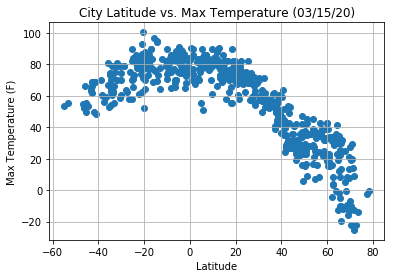

In [8]:
# Set x and y values
x_values=Summary["Lat"]
y_values=Summary["Max Temp"]

# Build plot
plt.scatter(x_values, y_values)

# Set title and axis labels
plt.title(f"City Latitude vs. Max Temperature ({formatted_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Add grid
plt.grid()

# Create figure and export
fig4 = plt.gcf()
fig4.savefig("Output/Figures/Global_Latitude_vs_Temp.png")

# Show plot
plt.show()


#### Latitude vs. Humidity Plot

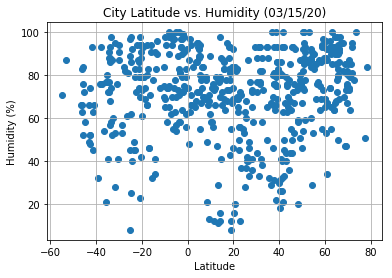

In [9]:
# Set x and y values
x_values=Summary["Lat"]
y_values=Summary["Humidity"]

# Build plot
plt.scatter(x_values, y_values)

# Set title and axis labels
plt.title(f"City Latitude vs. Humidity ({formatted_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Add grid
plt.grid()

# Create figure and export
fig4 = plt.gcf()
fig4.savefig("Output/Figures/Global_Latitude_vs_Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

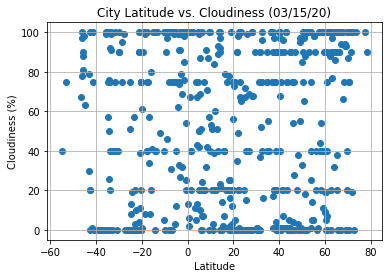

In [10]:
# Set x and y values
x_values=Summary["Lat"]
y_values=Summary["Cloudiness"]

# Build plot
plt.scatter(x_values, y_values)

# Set title and axis labels
plt.title(f"City Latitude vs. Cloudiness ({formatted_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Add grid
plt.grid()

# Create figure and export
fig4 = plt.gcf()
fig4.savefig("Output/Figures/Global_Latitude_vs_Cloud.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

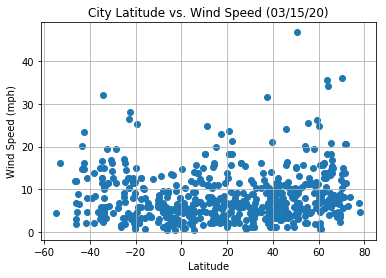

In [11]:
# Set x and y values
x_values=Summary["Lat"]
y_values=Summary["Wind Speed"]

# Build plot
plt.scatter(x_values, y_values)

# Set title and axis labels
plt.title(f"City Latitude vs. Wind Speed ({formatted_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Add grid
plt.grid()

# Create figure and export
fig4 = plt.gcf()
fig4.savefig("Output/Figures/Global_Latitude_vs_Wind.png")

# Show plot
plt.show()

## Linear Regression

In [12]:
# OPTIONAL: Create a function to create Linear Regression plots
def regression_plot(latitude, weather):
    # Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

    # Set x and y values of scatterplot
    x_values = latitude
    y_values = weather

    # Apply linear regression formula. Set line of linear regression.
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept

    # Write equation of regression line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        
    return  plt.plot(x_values,regress_values,"r-"), plt.annotate(line_eq, (10,100), fontsize=15, color="red", xycoords="axes points")

In [13]:
# Create Northern and Southern Hemisphere DataFrames
northern = Summary.loc[(Summary["Lat"]>0),:]
southern = Summary.loc[(Summary["Lat"]<0),:]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

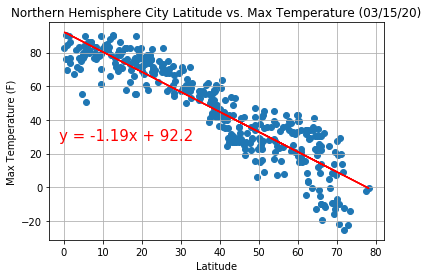

In [14]:
# Set x and y values
x_values=northern["Lat"]
y_values=northern["Max Temp"]

# Build plot
plt.scatter(x_values, y_values)

# Set title and axis labels
plt.title(f"Northern Hemisphere City Latitude vs. Max Temperature ({formatted_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Add grid
plt.grid()

# Show equation for linear regression line
regression_plot(x_values, y_values)

# Create figure and export
fig4 = plt.gcf()
fig4.savefig("Output/Figures/North_Latitude_vs_Temp.png")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

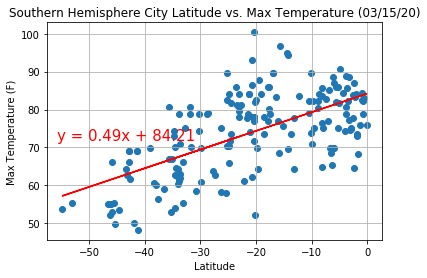

In [15]:
# Set x and y values
x_values=southern["Lat"]
y_values=southern["Max Temp"]

# Build plot
plt.scatter(x_values, y_values)

# Set title and axis labels
plt.title(f"Southern Hemisphere City Latitude vs. Max Temperature ({formatted_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Add grid
plt.grid()

# Show equation for linear regression line
regression_plot(x_values, y_values)

# Create figure and export
fig4 = plt.gcf()
fig4.savefig("Output/Figures/South_Latitude_vs_Temp.png")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

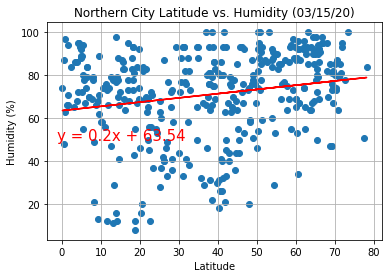

In [16]:
# Set x and y values
x_values=northern["Lat"]
y_values=northern["Humidity"]

# Build plot
plt.scatter(x_values, y_values)

# Set title and axis labels
plt.title(f"Northern City Latitude vs. Humidity ({formatted_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Add grid
plt.grid()

# Show equation for linear regression line
regression_plot(x_values, y_values)

# Create figure and export
fig4 = plt.gcf()
fig4.savefig("Output/Figures/North_Latitude_vs_Humidity.png")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

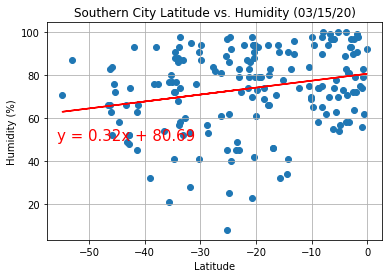

In [17]:
# Set x and y values
x_values=southern["Lat"]
y_values=southern["Humidity"]

# Build plot
plt.scatter(x_values, y_values)

# Set title and axis labels
plt.title(f"Southern City Latitude vs. Humidity ({formatted_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Add grid
plt.grid()

# Show equation for linear regression line
regression_plot(x_values, y_values)

# Create figure and export
fig4 = plt.gcf()
fig4.savefig("Output/Figures/North_Latitude_vs_Humidity.png")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

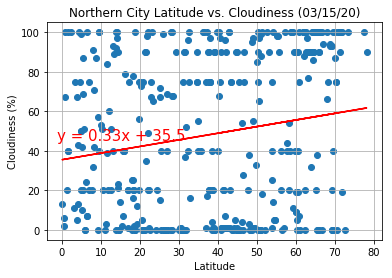

In [18]:
# Set x and y values
x_values=northern["Lat"]
y_values=northern["Cloudiness"]

# Build plot
plt.scatter(x_values, y_values)

# Set title and axis labels
plt.title(f"Northern City Latitude vs. Cloudiness ({formatted_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Add grid
plt.grid()

# Show equation for linear regression line
regression_plot(x_values, y_values)

# Create figure and export
fig4 = plt.gcf()
fig4.savefig("Output/Figures/North_Latitude_vs_Cloud.png")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

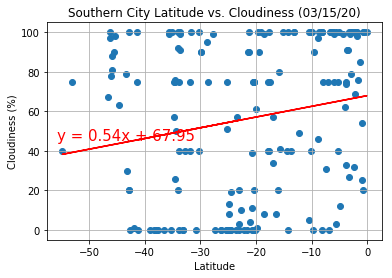

In [19]:
# Set x and y values
x_values=southern["Lat"]
y_values=southern["Cloudiness"]

# Build plot
plt.scatter(x_values, y_values)

# Set title and axis labels
plt.title(f"Southern City Latitude vs. Cloudiness ({formatted_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Add grid
plt.grid()

# Show equation for linear regression line
regression_plot(x_values, y_values)

# Create figure and export
fig4 = plt.gcf()
fig4.savefig("Output/Figures/South_Latitude_vs_Cloud.png")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

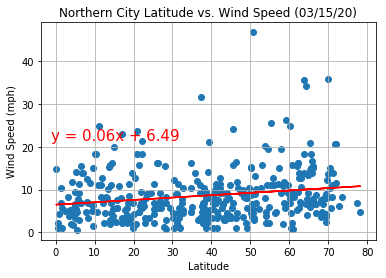

In [20]:
# Set x and y values
x_values=northern["Lat"]
y_values=northern["Wind Speed"]

# Build plot
plt.scatter(x_values, y_values)

# Set title and axis labels
plt.title(f"Northern City Latitude vs. Wind Speed ({formatted_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Add grid
plt.grid()

# Show equation for linear regression line
regression_plot(x_values, y_values)

# Create figure and export
fig4 = plt.gcf()
fig4.savefig("Output/Figures/Northern_Latitude_vs_Wind.png")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

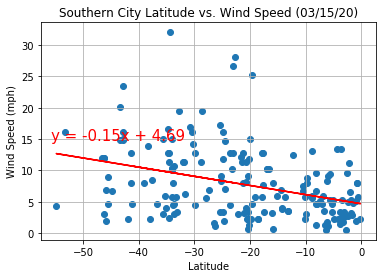

In [21]:
# Set x and y values
x_values=southern["Lat"]
y_values=southern["Wind Speed"]

# Build plot
plt.scatter(x_values, y_values)

# Set title and axis labels
plt.title(f"Southern City Latitude vs. Wind Speed ({formatted_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Add grid
plt.grid()

# Show equation for linear regression line
regression_plot(x_values, y_values)

# Create figure and export
fig4 = plt.gcf()
fig4.savefig("Output/Figures/Southern_Latitude_vs_Wind.png")

# Show plot
plt.show()